# Introdução 

<p style="text-align: justify;"> Vamos trabalhar com um dataset de uma empresa indiana. Essa empresa possui a característica que uma quantia considerável de funcionários saem da mesma e deseja-se evitar isso, afinal de contas, a saída de um funcionário gera custos adicionais a empresa. Por exemplo, quando um funcionário sai de forma inesperada, temos que levar em conta um custo extra com recrutamento, seleção, treinamento e um custo extra que pode ser devido a produtividade do novo profissional tão boa quanto a do anterior.
    
Nosso conjunto de dados é extenso, sendo composto por 5 tabelas nas quais

- manager_survey_data: Contém informações dos gestores a respeito dos funcionários.
- employee_survey_data: Contém informações dos funcionários a respeito do que estão achando da experiência de trabalhar no local.
- in_time e out_time: Duas tabelas contendo informações a respeito do horário de chegada e de larga dos funcionários no período de um ano, sem contar os finais de semana.
- general_data: Essa é a maior tabela. Ela possui dados gerais a respeito dos funcionários, como salário, cargo, tempo na empresa, entre outros.
    
Vamos começar conhecendo nossos dados.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import spearmanr

In [2]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)

plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [3]:
df_general_data = pd.read_csv("general_data.csv")
df_employee_survey_data = pd.read_csv("employee_survey_data.csv")
df_in_time = pd.read_csv("in_time.csv")
df_out_time = pd.read_csv("out_time.csv")
df_manager_survey_data = pd.read_csv("manager_survey_data.csv")

In [4]:
df_manager_survey_data.head(4)

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3


In [5]:
df_general_data.head(4)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5


In [6]:
df_employee_survey_data.head(4)

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0


In [7]:
df_in_time.head(4)

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,NaN,2015-01-15 10:01:24,2015-01-16 10:19:08,NaN,2015-01-20 09:50:34,2015-01-21 09:49:42,2015-01-22 09:47:45,2015-01-23 09:23:44,NaN,2015-01-27 09:50:37,2015-01-28 09:56:13,2015-01-29 09:53:47,2015-01-30 10:09:26,2015-02-02 09:38:43,2015-02-03 10:23:38,2015-02-04 09:48:37,2015-02-05 09:52:36,2015-02-06 09:53:23,2015-02-09 10:01:45,2015-02-10 10:14:18,2015-02-11 10:18:44,2015-02-12 10:10:35,2015-02-13 09:13:07,2015-02-16 10:14:02,2015-02-17 10:03:08,2015-02-18 10:23:06,NaN,2015-02-20 09:54:56,2015-02-23 09:46:59,2015-02-24 10:11:18,2015-02-25 09:52:36,2015-02-26 09:56:33,2015-02-27 09:58:46,2015-03-02 10:19:43,2015-03-03 10:08:37,2015-03-04 10:05:38,NaN,2015-03-06 09:55:53,2015-03-09 10:28:34,2015-03-10 09:47:30,2015-03-11 09:48:59,2015-03-12 10:10:51,2015-03-13 10:07:18,NaN,2015-03-17 10:05:22,2015-03-18 10:28:21,2015-03-19 10:01:52,2015-03-20 10:37:49,2015-03-23 10:11:19,2015-03-24 10:33:19,2015-03-25 09:41:35,NaN,2015-03-27 09:47:30,2

In [8]:
df_out_time.head(4)

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,NaN,2015-01-15 17:22:13,2015-01-16 17:35:11,NaN,2015-01-20 16:37:07,2015-01-21 16:55:24,2015-01-22 16:50:47,2015-01-23 17:00:01,NaN,2015-01-27 17:28:22,2015-01-28 17:03:21,2015-01-29 17:18:36,2015-01-30 17:00:25,2015-02-02 16:32:49,2015-02-03 17:35:49,2015-02-04 17:24:56,2015-02-05 17:26:31,2015-02-06 17:21:35,2015-02-09 17:37:50,2015-02-10 17:30:20,2015-02-11 17:30:19,2015-02-12 17:36:42,2015-02-13 16:25:26,2015-02-16 17:50:23,2015-02-17 17:28:06,2015-02-18 18:13:29,NaN,2015-02-20 17:44:52,2015-02-23 17:13:27,2015-02-24 17:24:48,2015-02-25 17:27:37,2015-02-26 17:08:36,2015-02-27 17:21:55,2015-03-02 17:29:08,2015-03-03 16:54:12,2015-03-04 17:50:18,NaN,2015-03-06 17:44:47,2015-03-09 17:53:05,2015-03-10 16:42:53,2015-03-11 16:58:39,2015-03-12 17:15:39,2015-03-13 17:25:55,NaN,2015-03-17 17:00:16,2015-03-18 17:40:13,2015-03-19 17:52:44,2015-03-20 17:47:34,2015-03-23 17:48:18,2015-03-24 17:48:26,2015-03-25 17:08:19,NaN,2015-03-27 17:20:51,2

<p style="text-align: justify;"> visualisando os dados acima, podemos realizar algumas alterações. Primeiramente, é interessante que todos os dados essenciais para a construção do nosso modelo esteja em apenas um dataframe, para facilitar o desenvolvimento do código. Além disso, esses dataframes contendo informações de entrada e saída de funcionários são muito extensos e pouco informativos, podemos extrair algumas informações mais úteis para a nossa análise como o número de horas médio dos funcionários e o número de dias faltados, uma vez que os finais de semanas já estão de fora dos dados. Começando pelo número de dias que os funcionários faltaram

In [9]:
dias_f = df_in_time.isna().sum(axis = 1)

In [10]:
dias_f

0       29
1       25
2       19
3       26
4       16
        ..
4405    18
4406    20
4407    30
4408    20
4409    29
Length: 4410, dtype: int64

para começarmos a tratar os dados dessas tabelas in_time e out_time, vamos remover essa primeira coluna Unnamed: 0

In [11]:
df_in_time = df_in_time.drop('Unnamed: 0', axis = 1)
df_out_time = df_out_time.drop('Unnamed: 0', axis = 1)

agora, transformando o formato dos dados

In [12]:
lista = df_in_time.columns.tolist()
df_worked_time = pd.DataFrame(columns = lista)

In [13]:
for elemento in lista:
    df_in_time[elemento] = pd.to_datetime(df_in_time[elemento])
    df_out_time[elemento] = pd.to_datetime(df_out_time[elemento])
    df_worked_time[elemento] = df_out_time[elemento] - df_in_time[elemento]
    df_worked_time[elemento] = df_worked_time[elemento].dt.total_seconds() / 3600
    df_worked_time[elemento] = df_worked_time[elemento].round(2)

In [14]:
df_worked_time.mean(axis = 1)

0       7.373707
1       7.718771
2       7.013306
3       7.193489
4       8.006367
          ...   
4405    8.522181
4406    6.092822
4407    7.706797
4408    9.492282
4409    6.989052
Length: 4410, dtype: float64

nos fornecendo assim a média de horas trabalhada por cada funcionário. Vamos agora ao número de dias que cada funcionário faltou

In [15]:
df_absent = df_in_time.isna().sum(axis = 1)

agregando essas duas colunas aos nossos dados

In [16]:
df = df_general_data
df['worked_time'] = df_worked_time.mean(axis = 1)
df['days_absent'] = df_absent

In [17]:
df.head(3)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,worked_time,days_absent
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,7.373707,29
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,7.718771,25
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,7.013306,19


agregando todos em um único dataframe

In [18]:
result = pd.concat([df, df_employee_survey_data], axis = 1)
result = pd.concat([result, df_manager_survey_data], axis = 1)
df = result

In [19]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,worked_time,days_absent,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,EmployeeID,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,7.373707,29,1,3.0,4.0,2.0,1,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,7.718771,25,2,3.0,2.0,4.0,2,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,7.013306,19,3,2.0,2.0,1.0,3,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,7.193489,26,4,4.0,4.0,3.0,4,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,8.006367,16,5,4.0,1.0,3.0,5,3,3


## Análise exploratória de dados - Parte 1: Conhecendo os dados

Precisamos investigar o perfil das pessoas dessa empresa. A começa pela idade, pois uma alta idade associada a um alto nível de saídas pode significar aposentadoria, por exemplo

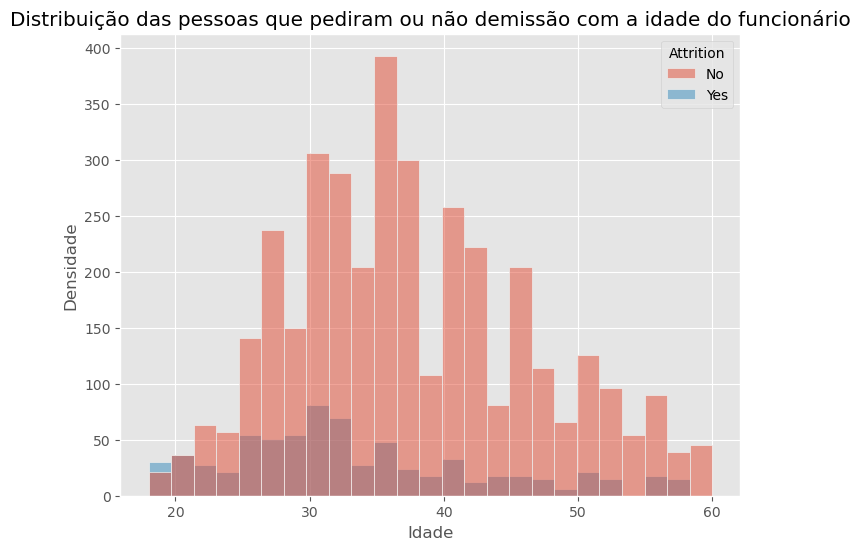

In [20]:
plt.figure(figsize=(8, 6))
sns.histplot(x='Age', data=df, bins = 25, hue = 'Attrition')
plt.title(label='Distribuição das pessoas que pediram ou não demissão com a idade do funcionário')
plt.xlabel('Idade')
plt.ylabel('Densidade')
plt.show()

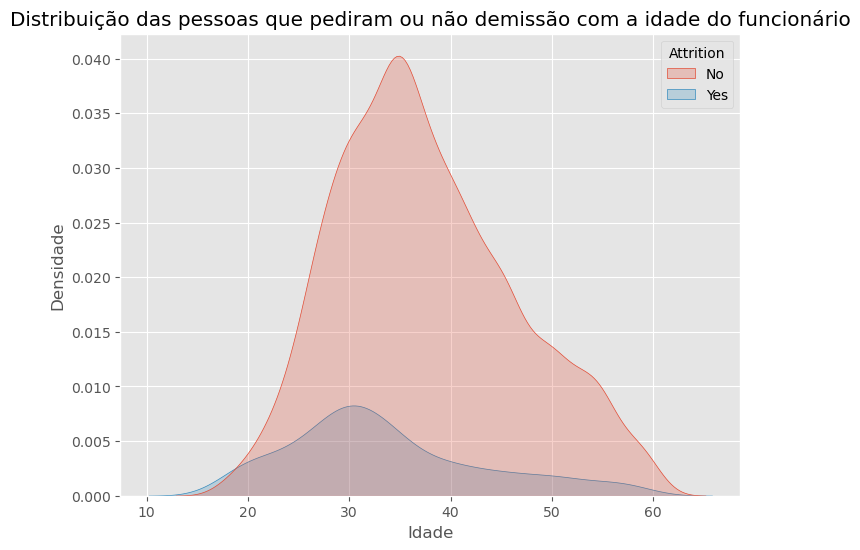

In [21]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Age'], shade=True, hue = df['Attrition'])
plt.title(label='Distribuição das pessoas que pediram ou não demissão com a idade do funcionário')
plt.xlabel('Idade')
plt.ylabel('Densidade')
plt.show()

In [22]:
print("A média de idade dos funcionários que pediram demissão é:", df[df['Attrition'] == 'Yes']['Age'].mean())
print("A média de idade dos funcionários que não pediram demissão é:", df[df['Attrition'] == 'No']['Age'].mean())

A média de idade dos funcionários que pediram demissão é: 33.607594936708864
A média de idade dos funcionários que não pediram demissão é: 37.561232765612324


isso implica dizer que a média das pessoas que saem da empresa é 33 anos enquanto as pessoas que não saíram possuem média de 37 anos. Agora vamos investigar como o gênero se encaixa no perfil das pessoas que pediram demissão ou não

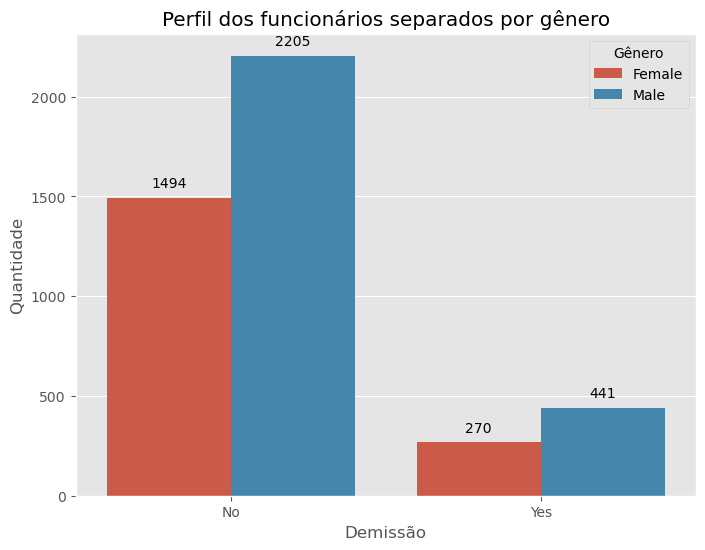

In [23]:
plt.figure(figsize=(8, 6))
plot = sns.countplot(x='Attrition', data=df, hue='Gender')

for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')

plt.title('Perfil dos funcionários separados por gênero')
plt.xlabel('Demissão')
plt.ylabel('Quantidade')
plt.legend(title='Gênero')


vamos investigar se existe uma diferença salarial entre homens e mulheres nessa empresa

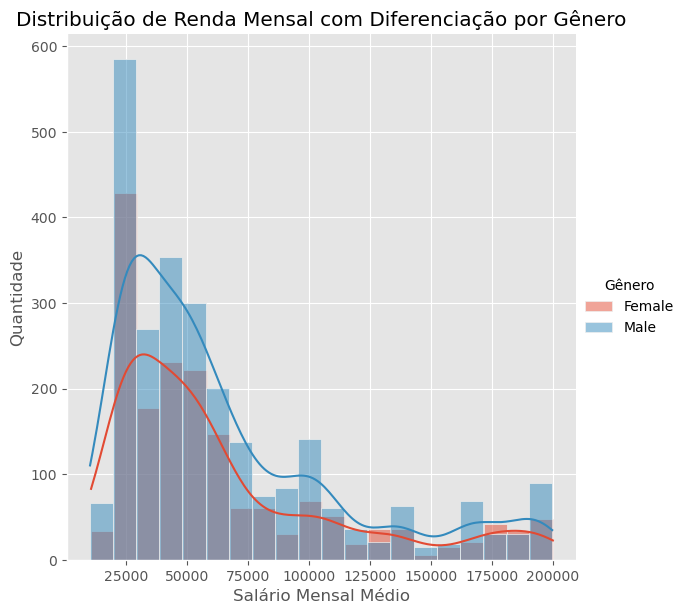

In [24]:
g = sns.FacetGrid(df, hue="Gender", height=6)
g.map(sns.histplot, "MonthlyIncome", bins=20, kde=True, alpha=0.5)
g.add_legend(title="Gênero")
plt.title('Distribuição de Renda Mensal com Diferenciação por Gênero')
plt.xlabel('Salário Mensal Médio')
plt.ylabel('Quantidade')
plt.show()

In [25]:
print("A média salarial dos homens da empresa é:",df.loc[df['Gender'] == 'Male', 'MonthlyIncome'].mean())
print("A média salarial das mulheres da empresa é:", df.loc[df['Gender'] == 'Female', 'MonthlyIncome'].mean())

A média salarial dos homens da empresa é: 65318.684807256235
A média salarial das mulheres da empresa é: 64595.255102040814


existe uma diferença, mas apenas a média não é suficiente para investigarmos isso. Vamos consultar cargo a cargo

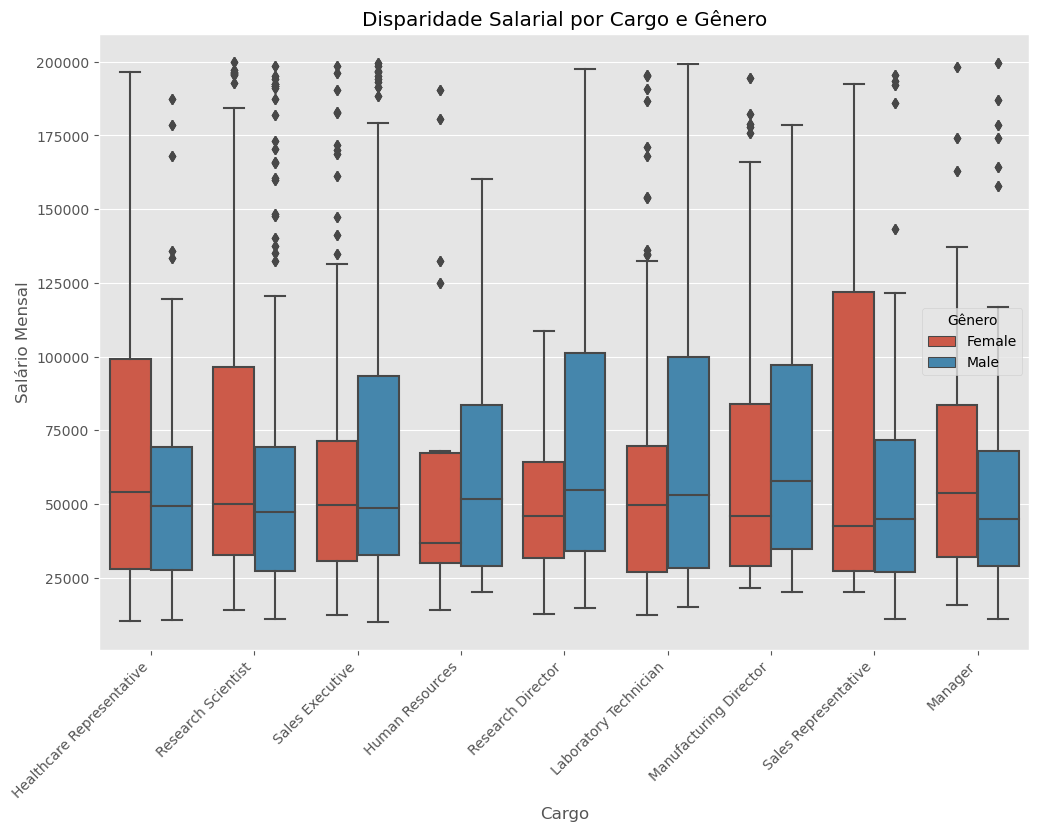

In [26]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='JobRole', y='MonthlyIncome', hue='Gender', data=df)
plt.title('Disparidade Salarial por Cargo e Gênero')
plt.xlabel('Cargo')
plt.ylabel('Salário Mensal')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gênero')
plt.show()

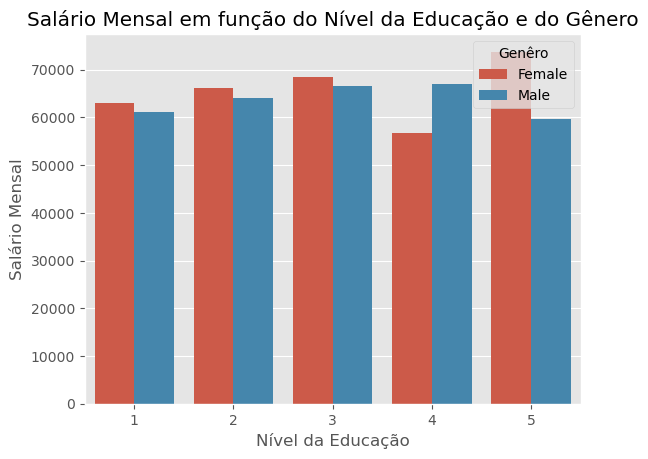

In [27]:
mean_salaries = df.groupby(['Education', 'Gender'])['MonthlyIncome'].mean().reset_index()

# Cria o gráfico de barras
sns.barplot(x='Education', y='MonthlyIncome', hue='Gender', data=mean_salaries)

# Adiciona um título ao gráfico
plt.title('Salário Mensal em função do Nível da Educação e do Gênero')

# Adiciona rótulos aos eixos
plt.xlabel('Nível da Educação')
plt.ylabel('Salário Mensal')

# Mostra a legenda
plt.legend(title='Genêro')

Logo, a menos das pessoas que possuem mestrado, em média, as mulheres possuem um maior salário. Vamos investigar como o salário se liga a cada cargo

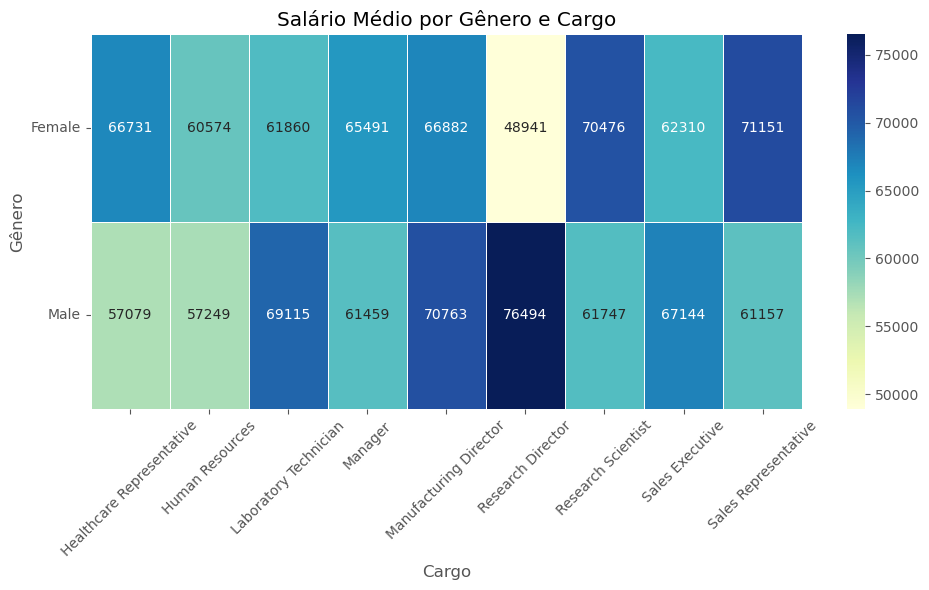

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que você já tenha um DataFrame chamado df com as colunas Education, MonthlyIncome e Jobrole

# Calcular o salário médio para cada combinação de Education e Jobrole
salary_avg = df.groupby(['Gender', 'JobRole'])['MonthlyIncome'].mean().reset_index()

# Reorganizar os dados em um formato de tabela pivô para criar o heatmap
pivot_table = salary_avg.pivot('Gender', 'JobRole', 'MonthlyIncome')

# Criar o heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)
plt.title('Salário Médio por Gênero e Cargo')
plt.xlabel('Cargo')
plt.ylabel('Gênero')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [29]:
women_df = df[df['Gender'] == 'Female']
men_df = df[df['Gender'] == 'Male']
women_df['YearsSinceLastPromotion'].mean()

2.2738095238095237

In [30]:
men_df['YearsSinceLastPromotion'].mean()

2.130385487528345

Em média, homens e mulheres são promovidos com a mesma quantidade de anos de trabalho.

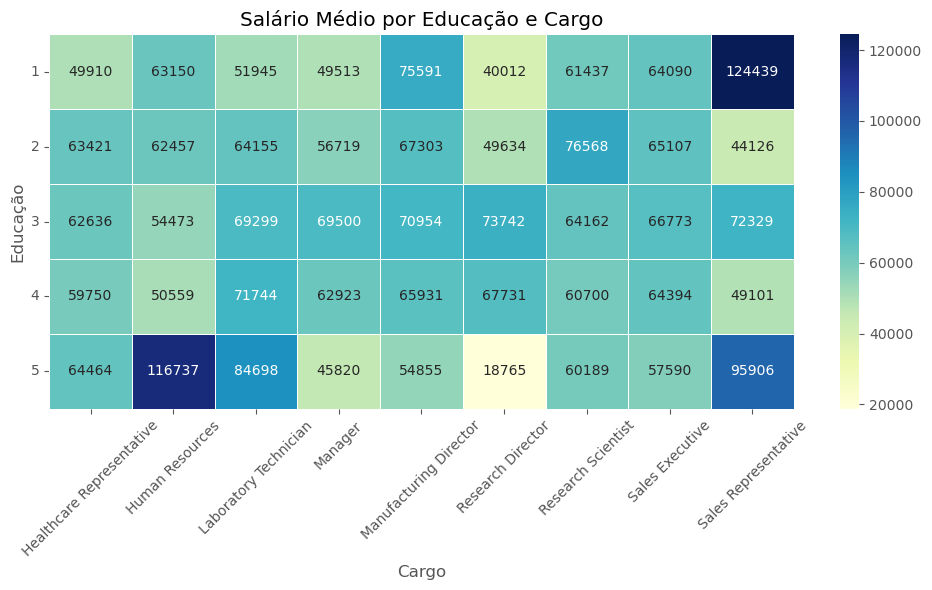

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que você já tenha um DataFrame chamado df com as colunas Education, MonthlyIncome e Jobrole

# Calcular o salário médio para cada combinação de Education e Jobrole
salary_avg = df.groupby(['Education', 'JobRole'])['MonthlyIncome'].mean().reset_index()

# Reorganizar os dados em um formato de tabela pivô para criar o heatmap
pivot_table = salary_avg.pivot('Education', 'JobRole', 'MonthlyIncome')

# Criar o heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)
plt.title('Salário Médio por Educação e Cargo')
plt.xlabel('Cargo')
plt.ylabel('Educação')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


conseguimos então encontrar algumas informações interessantes. Em grande maioria dos cargos, um maior nível de escolaridade não garante, em média, uma maior média salarial. Além disso, é notório que as pessoas com Mestrado (Education = 4) são as menos valorizadas na empresa.

In [32]:
df[(df['Education'] == 4) | (df['Education'] == 5)]['Gender'].value_counts()

Male      810
Female    528
Name: Gender, dtype: int64

In [33]:
df['Gender'].value_counts()

Male      2646
Female    1764
Name: Gender, dtype: int64

In [34]:
print("A porcentagem de mulheres com maior nível educacional é de", round((528/1764)*100, 2))
print("A porcentagem de homens com maior nível educacional é de", round((810/2646)*100, 2))

A porcentagem de mulheres com maior nível educacional é de 29.93
A porcentagem de homens com maior nível educacional é de 30.61


daí, em média, temos a mesma quantia de homens e mulheres (em porcentagem do total de homens e mulheres) com nível educacional mais elevado. Vamos estudar como o salário varia com relação a experiência profissional total do funcionário

<Figure size 1200x800 with 0 Axes>

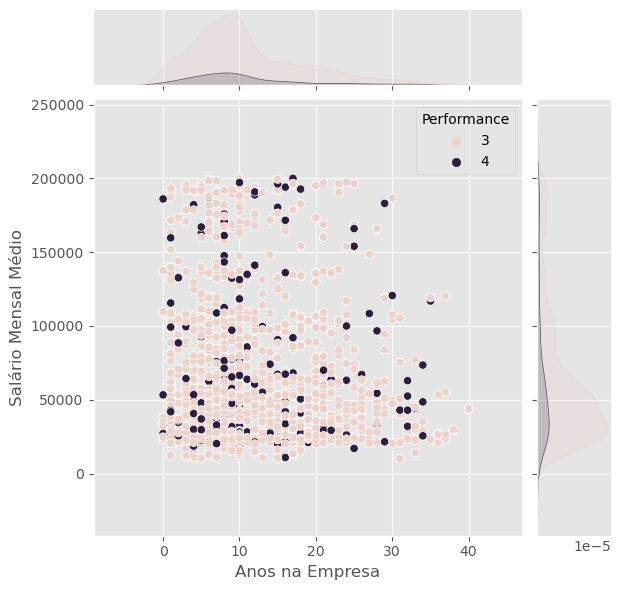

In [35]:
plt.figure(figsize=(12, 8))
grafico = sns.jointplot(x='TotalWorkingYears', y='MonthlyIncome', data=df, hue='PerformanceRating')
grafico.set_axis_labels('Anos na Empresa', 'Salário Mensal Médio', fontsize=12)
grafico.ax_joint.legend(title='Performance', fontsize=10)
plt.show()


<Figure size 1200x800 with 0 Axes>

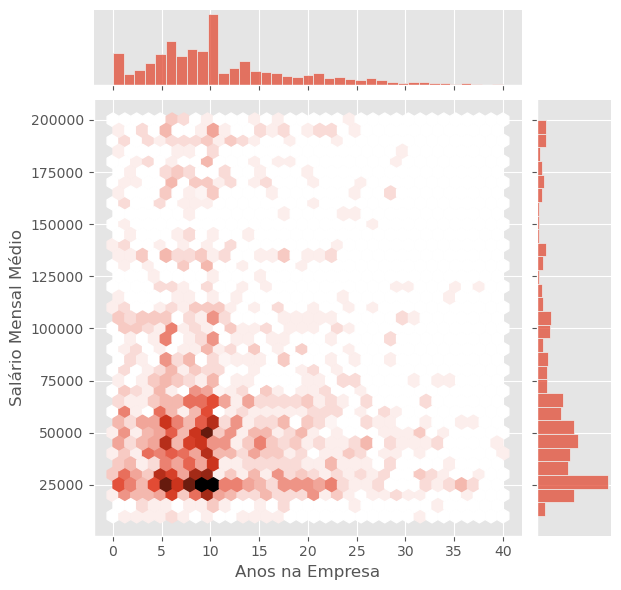

In [36]:
plt.figure(figsize=(12, 8))
sns.jointplot(x = 'TotalWorkingYears', y = 'MonthlyIncome', data = df, kind = 'hex')
plt.xlabel('Anos na Empresa')
plt.ylabel('Salário Mensal Médio')
plt.show()

In [37]:
df['PerformanceRating'].value_counts()

3    3732
4     678
Name: PerformanceRating, dtype: int64

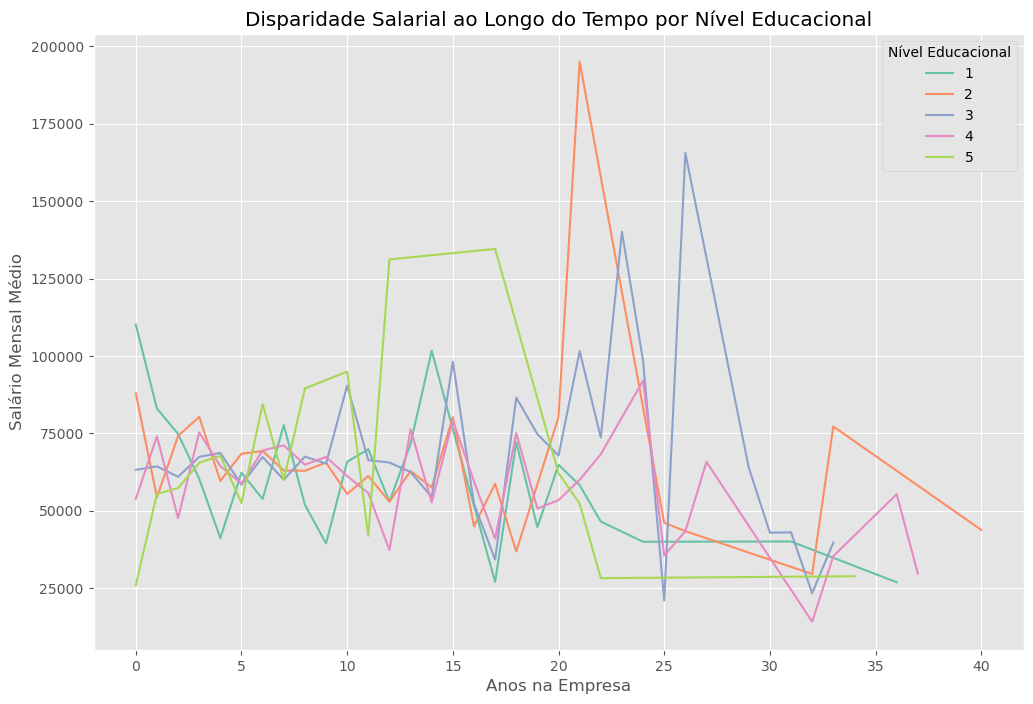

In [38]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='YearsAtCompany', y='MonthlyIncome', hue='Education', data=df, ci=None, palette='Set2')
plt.title('Disparidade Salarial ao Longo do Tempo por Nível Educacional')
plt.xlabel('Anos na Empresa')
plt.ylabel('Salário Mensal Médio')
plt.legend(title='Nível Educacional')
plt.show()

<p style="text-align: justify;"> Além disso, vemos que, apesar do muito tempo de trabalho e uma boa performance, os funcionários continuam com salários baixos, o que é um indicativo considerável para a grande evasão na empresa. Os dados nos dizem bastante sobre a qualidade de trabalho dos funcionários.

Text(0, 0.5, 'Porcentagem')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


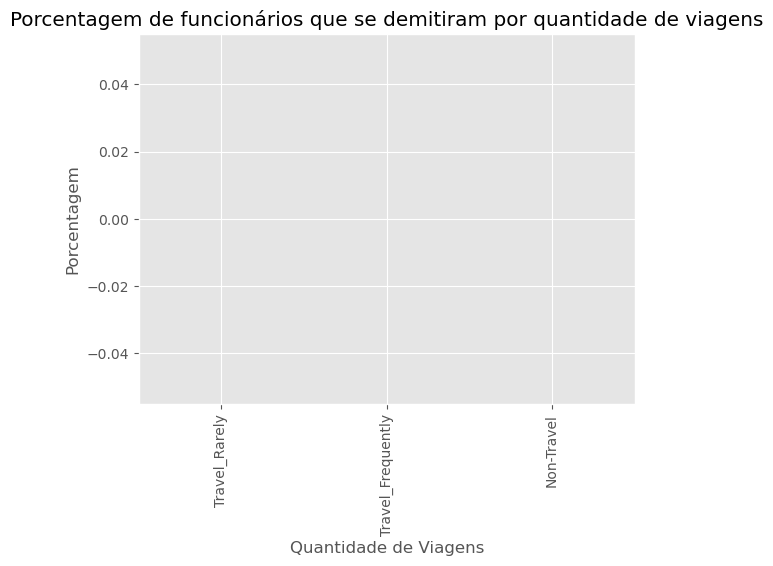

In [39]:
percentage_attrition_by_travel = (df[df['Attrition'] == 1]['BusinessTravel'].value_counts() / df['BusinessTravel'].value_counts()) * 100
ax = percentage_attrition_by_travel.plot(kind='bar', color='blue')
for i, v in enumerate(percentage_attrition_by_travel):
    ax.text(i, v + 1, f'{v:.2f}%', ha='center')
plt.title('Porcentagem de funcionários que se demitiram por quantidade de viagens')
plt.xlabel('Quantidade de Viagens')
plt.ylabel('Porcentagem')


temos a seguinte interpretação: entre as pessoas que viajam raramente, 14,96% se demitem. Entre as que viajam com frequência, 24,91% se demitem e entre as que não viajam, apenas 8% se demitiram.

<AxesSubplot:>

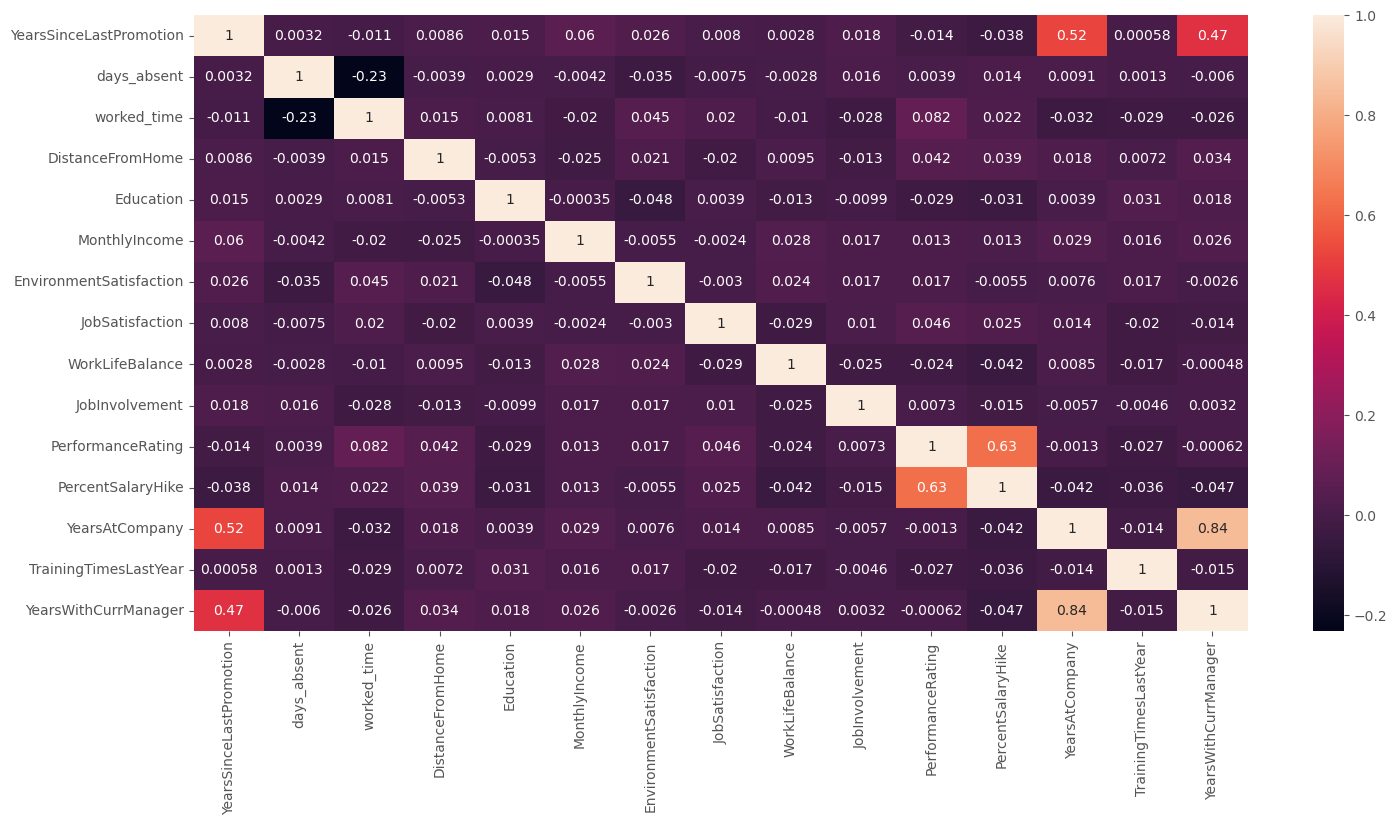

In [40]:
plt.figure(figsize=(17, 8))
relevant_columns = ['YearsSinceLastPromotion', 'days_absent','worked_time','DistanceFromHome', 'Education','MonthlyIncome','EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating', 'PercentSalaryHike', 'YearsAtCompany', 'TrainingTimesLastYear', 'YearsWithCurrManager']
correlation_matrix = df[relevant_columns]
sns.heatmap(correlation_matrix.corr(method = 'spearman'), annot = True)

<p style="text-align: justify;"> No mapa acima fizemos uso da Correlação de Spearman. Ela é uma correlação que busca estudar a relação monotônica entre duas variáveis, isto é, se uma variável está crescendo, a outra também estará (o contrário também vale) de forma não constante. Ela é particularmente útil quando os dados não estão seguindo uma distribuição gaussiana. Além disso, ela é pouco sensível a outliers (que já verificamos que temos). Precisamos agora olhar as outras variáveis envolvendo o trabalho.

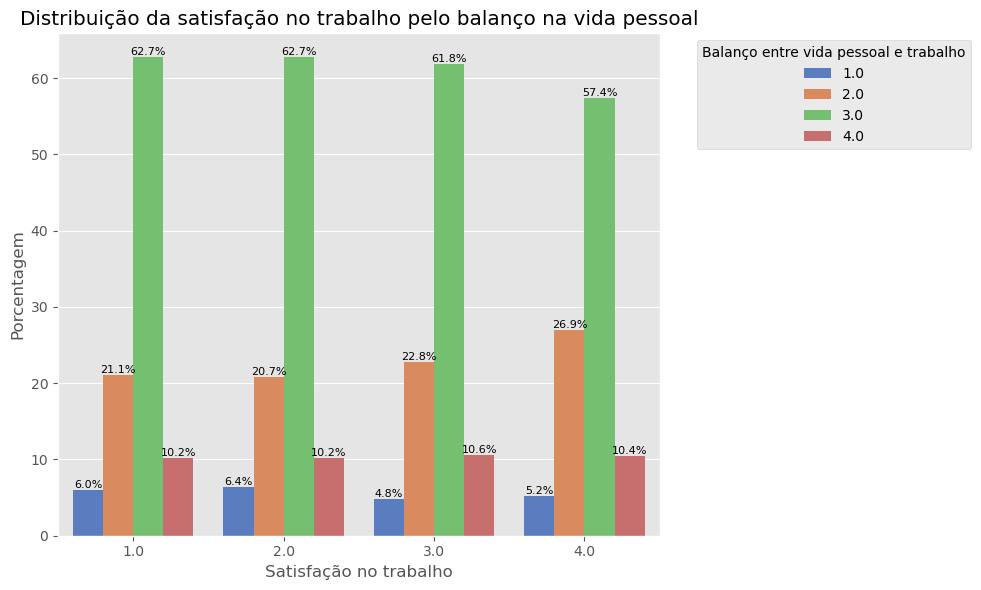

In [41]:
counts = df.groupby(['JobSatisfaction', 'WorkLifeBalance']).size().reset_index(name='count')
counts['percentage'] = counts.groupby('JobSatisfaction')['count'].transform(lambda x: x / x.sum() * 100)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='JobSatisfaction', y='percentage', hue='WorkLifeBalance', data=counts, palette='muted')
plt.title('Distribuição da satisfação no trabalho pelo balanço na vida pessoal')
plt.xlabel('Satisfação no trabalho')
plt.ylabel('Porcentagem')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, '{:.1f}%'.format(height), ha="center", va="bottom", fontsize=8)

plt.legend(title='Balanço entre vida pessoal e trabalho', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()


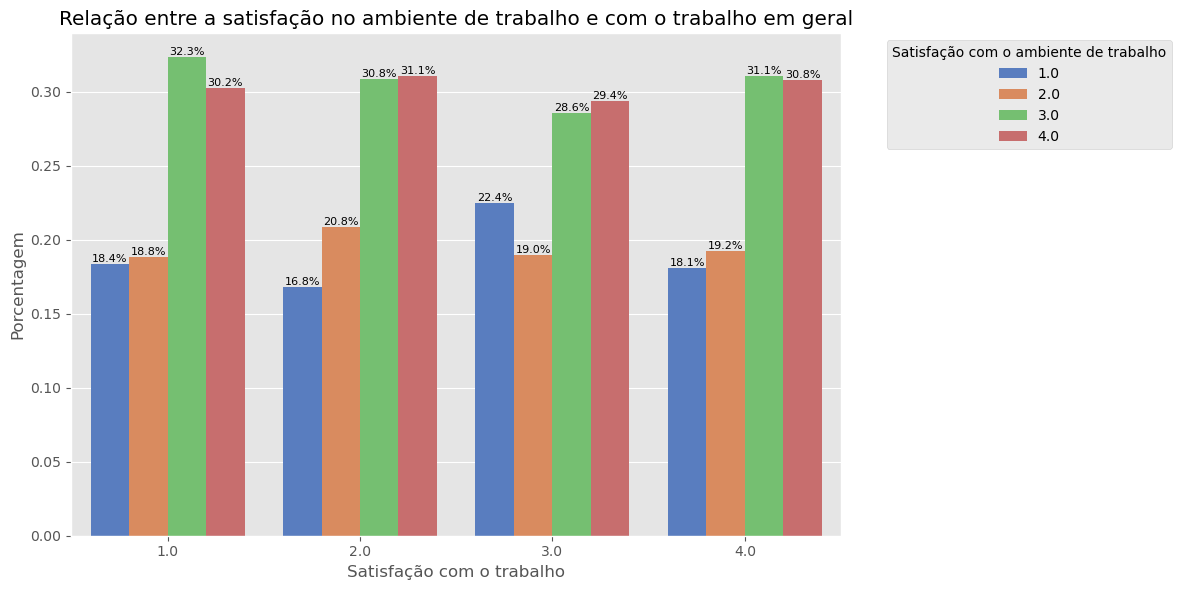

In [42]:
plt.figure(figsize=(12, 6))
total_counts = df.groupby('JobSatisfaction').size()
counts = df.groupby(['JobSatisfaction', 'EnvironmentSatisfaction']).size().reset_index(name='count')
counts['percentage'] = counts.apply(lambda x: x['count'] / total_counts[x['JobSatisfaction']], axis=1)
ax = sns.barplot(x='JobSatisfaction', y='percentage', hue='EnvironmentSatisfaction', data=counts, palette='muted',
                 saturation=0.75, dodge=True)
plt.title('Relação entre a satisfação no ambiente de trabalho e com o trabalho em geral')
plt.xlabel('Satisfação com o trabalho')
plt.ylabel('Porcentagem')
for p in ax.patches:
    height = p.get_height()
    if height > 0.02: 
        ax.text(p.get_x() + p.get_width() / 2., height, '{:.1f}%'.format(height * 100), ha="center", va="bottom" if height > 0.1 else "top", fontsize=8)

plt.legend(title='Satisfação com o ambiente de trabalho', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout() 

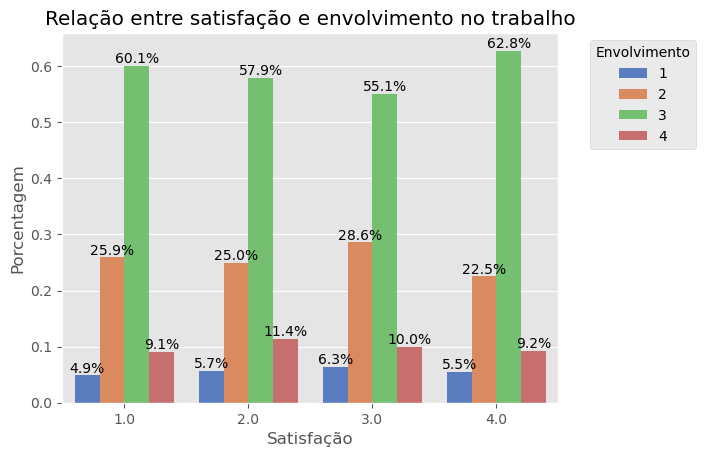

In [43]:
total_counts = df.groupby('JobSatisfaction').size()
counts = df.groupby(['JobSatisfaction', 'JobInvolvement']).size().reset_index(name='count')
counts['percentage'] = counts.apply(lambda x: x['count'] / total_counts[x['JobSatisfaction']], axis=1)
ax = sns.barplot(x='JobSatisfaction', y='percentage', hue='JobInvolvement', data=counts, palette='muted')

plt.title('Relação entre satisfação e envolvimento no trabalho')

plt.xlabel('Satisfação')
plt.ylabel('Porcentagem')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, '{:.1f}%'.format(height * 100), ha="center", va="bottom")

plt.legend(title='Envolvimento', bbox_to_anchor=(1.05, 1), loc='upper left')

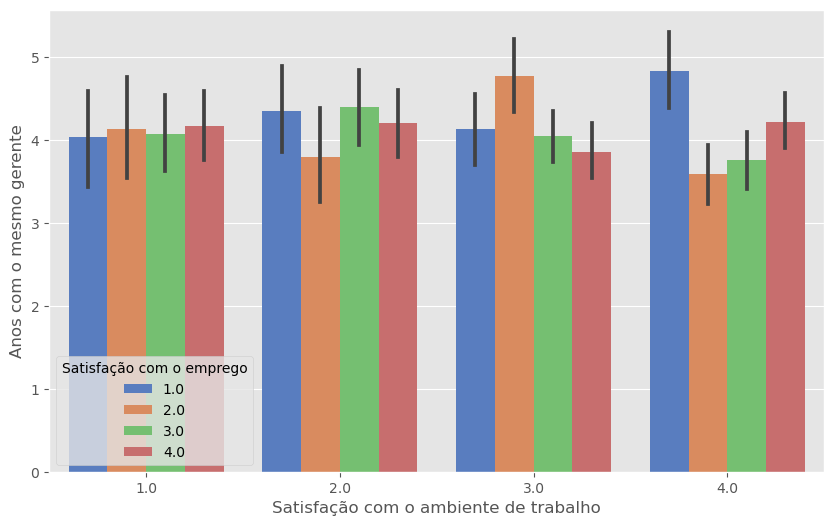

In [44]:
plt.figure(figsize=(10, 6))
sns.barplot(x='EnvironmentSatisfaction', y='YearsWithCurrManager', hue='JobSatisfaction', data=df, palette="muted")
plt.xlabel('Satisfação com o ambiente de trabalho')
plt.ylabel('Anos com o mesmo gerente')
plt.legend(title='Satisfação com o emprego')

Text(0, 0.5, 'Porcentagem do Total')

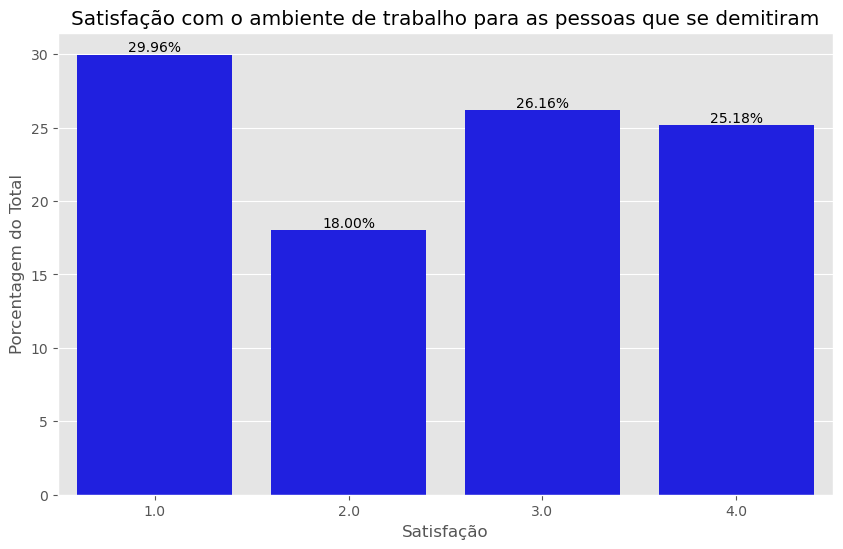

In [45]:
df_attrition_yes = df[df['Attrition'] == 'Yes']
total_obs = len(df_attrition_yes)
counts = df_attrition_yes['EnvironmentSatisfaction'].value_counts()
percentages = (counts / total_obs) * 100
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=percentages.index, y=percentages.values, color='blue')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.title('Satisfação com o ambiente de trabalho para as pessoas que se demitiram')
plt.xlabel('Satisfação')
plt.ylabel('Porcentagem do Total')


Text(0, 0.5, 'Porcentagem do Total')

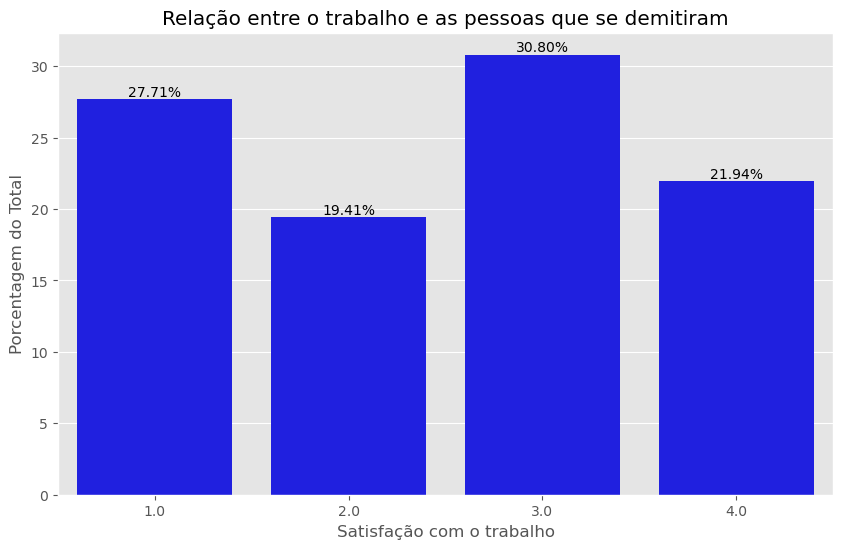

In [46]:
total_obs = len(df_attrition_yes)
counts = df_attrition_yes['JobSatisfaction'].value_counts()
percentages = (counts / total_obs) * 100
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=percentages.index, y=percentages.values, color='blue')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.title('Relação entre o trabalho e as pessoas que se demitiram')
plt.xlabel('Satisfação com o trabalho')
plt.ylabel('Porcentagem do Total')


Text(0, 0.5, 'Porcentagem do Total')

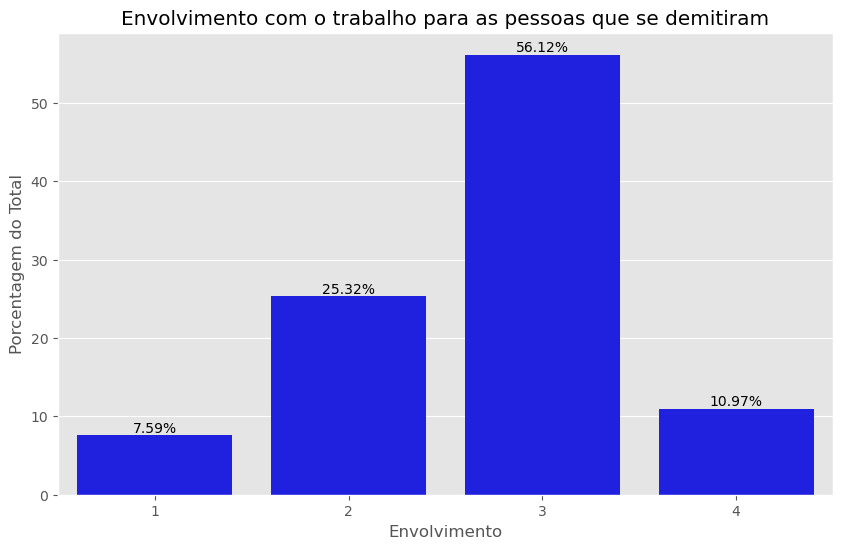

In [47]:
total_obs = len(df_attrition_yes)
counts = df_attrition_yes['JobInvolvement'].value_counts()
percentages = (counts / total_obs) * 100
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=percentages.index, y=percentages.values, color='blue')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.title('Envolvimento com o trabalho para as pessoas que se demitiram')
plt.xlabel('Envolvimento')
plt.ylabel('Porcentagem do Total')


Text(0, 0.5, 'Porcentagem do Total')

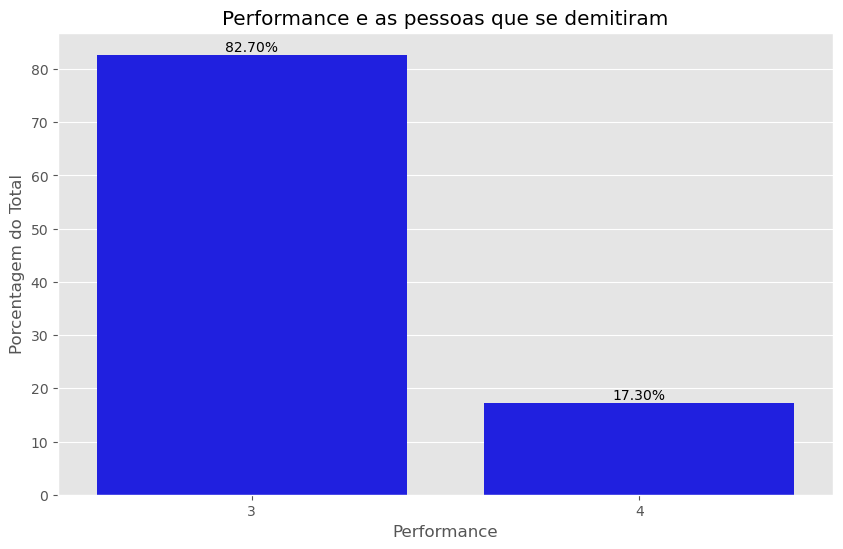

In [48]:
total_obs = len(df_attrition_yes)
counts = df_attrition_yes['PerformanceRating'].value_counts()
percentages = (counts / total_obs) * 100
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=percentages.index, y=percentages.values, color='blue')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.title('Performance e as pessoas que se demitiram')
plt.xlabel('Performance')
plt.ylabel('Porcentagem do Total')

Aqui nós temos um problema sério: das pessoas que saíram, aproximadamente metade não estavam muito satisfeitas com o trabalho e com o ambiente de trabalho. Além disso, aproximadamente 33% das pessoas que saíram da empresa não estavam envolvidas com o trabalho e 82.7% mostraram performance inferior.

<p style="text-align: justify;"> Estamos trabalhando com dados de uma empresa em que um grande número de pessoas pede demissão e nosso objetivo inicialmente é descobrir as razões, dando insights baseados em análise de dados e estatística. É primordial o entendimento dos dados para que possamos tomar decisões a respeito, antes de fazer quaisquer providências para melhorar esse aspecto da empresa. A instituição é composta em sua maioria por homens e a idade que prevalece entre os funcionários é a média idade (entre 30 e 40 anos). A média salarial entre homens e mulheres é aproximadamente a mesma (com a dos homens sendo um pouco maior), além disso, em porcentagem, mais homem deixam a empresa que mulheres (diferença menor que 2%). </p>

<p style="text-align: justify;"> Precisamos levar em consideração o número de viajens em que os funcionários estão submetidos a fazer. Sabemos que realizar viajens é importante para o trabalho, mas notem que entre as pessoas que viajam frequentemente cerca de 25% se demite. Isso quer dizer que, estatísticamente, 1 em cada 4 pessoas que viajam com frequência pedem demissão. Esse número excessivo de viajens pode estar causando perca da qualidade de vida dos funcionários, uma vez que precisam ficar longe dos familiares, amigos e de toda a vida pessoal enquanto estão viajando.

<p style="text-align: justify;"> A empresa possui três departamentos: Human Resources, Sales e Research and Development, que são do menor para o maior, em termos de número de funcionários. Para os homens, a média salarial aumenta conforme o nível da educação também aumenta, mas decai bruscamente quando o homem possui doutorado. Já nas mulheres, acontece uma queda nas que possuem mestrado e um pico nas que possuem doutorado. Observando a média salarial das mulheres com mestrado e que deixaram a empresa, podemos notar que o salário é 10% menor que o dos homens, além de ser 11% menor que a média das mulheres na empresa. Isso pode indicar que as mulheres com mestrado estão deixando a empresa pela falta de valorização, visto que estão recebendo abaixo da média. </p>

<p style="text-align: justify;"> Uma boa parte dos funcionários possui uma relação de mediana para boa com o trabalho. Observamos que mais da metade possui um bom envolvimento, bem como possuem um considerável balanço entre a vida e o trabalho. Não podemos ignorar que entre 25 e 30% dos funcionários não possuem um bom balanço na vida pessoal e com o trabalho e, essa mesma porcentagem, possuem um baixo envolvimento com o trabalho (falo das categorias 1 e 2), coisas que estão diretamente relacionadas. Além disso, entre 35 e 45% dos funcionários não estão tão satisfeitos com o ambiente de trabalho, o que é quase metade. Novas medidas devem ser tomadas de forma a deixar o ambiente melhor para os trabalhadores.

<p style="text-align: justify;"> Além disso, das pessoas que saíram, 48% não estavam satisfeitas com o ambiente de trabalho 47,12% não gostavam do trabalho em si e 33% admitiram não estar envolvidas com o trabalho, sendo que 82.7% teve uma baixa performance. Está claro que precisamos focar na valorização dos profissionais, é necessário um aumento de salário para os profissionais mais bem qualificados, uma vez que a média salarial quase não aumenta com a qualificação. A falta de valorização profissional faz com que na primeira oportunidade, ele saíra da empresa em busca de algo melhor. Além disso, precisamos tornar o ambiente de trabalho mais propício para trabalhar, 48% das pessoas que saíram indicaram que não estavam gostando do ambiente de trabalho, o que é praticamente metade.

Para resolver o problema, podemos inserir algumas novas coisas ao ambiente de trabalho. Dentre elas:

1- Podemos oferecer um desenvolvimento profissional, oferecendo workshops e mais treinamentos,

2- Uma vez que as pessoas demoram em média, mais tempo com o mesmo gestor que para ser promovida, uma estratégia saudável que pode ser implementada é a implantação de uma Comunicação Transparente, onde os funcionários podem se sentir confortáveis em dar feedbacks e expor suas preocupações,

3- Promover um maior equilíbrio entre a vida profissional e pessoal: oferecer mais trabalhos remotos e tornar o ambiente físico de trabalho mais confortável e acolhedor, com espaços para descanso e áreas verdes e ventiladas.

4- Promover mais eventos e atividades sociais ligadas a empresa, como Happy Hours e confraternizações.

# Modelo de previsões: Machine Learning

In [49]:
df.head(3)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,worked_time,days_absent,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,EmployeeID,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,7.373707,29,1,3.0,4.0,2.0,1,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,7.718771,25,2,3.0,2.0,4.0,2,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,7.013306,19,3,2.0,2.0,1.0,3,3,3


transformando a variável a ser prevista em numérica (1 para Yes e 0 para No)

In [50]:
df['Attrition'] = np.where(df['Attrition'] == 'Yes', 1, 0)

removendo as variáveis que não serão relevantes para o treinamento do modelo

In [51]:
df.drop(['EmployeeCount', 'EmployeeID', 'Over18', 'StandardHours'], axis = 1, inplace = True)

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, roc_curve, precision_recall_curve, precision_recall_curve, auc
from sklearn.ensemble import RandomForestClassifier, IsolationForest
import scikitplot as skplt
from scipy.stats import randint
from numpy import random
from imblearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

In [53]:
class IsolationForestTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, contamination):
        self.contamination = contamination
        self.model = IsolationForest(contamination=self.contamination)

    def fit(self, X, y=None):
        self.model.fit(X)
        return self

    def transform(self, X):
        return self.model.predict(X).reshape(-1, 1)

<p style="text-align: justify;"> Uma vez importadas as bibliotecas que iremos utilizar, precisamos separar os nossos dados em treino e teste antes de fazer qualquer escalonamento. Isso é necessário pois imagine que iremos aplicar um Standard Scaler, isso quer dizer que, para as nossas variáveis numéricas, nós iremos aplicação a transformação x -> (x - média)/desvio padrão, aplicando essa transformação, estamos "infectando" os dados de teste com informações dos dados de treino, logo, precisamos fazer essa mudança depois.

In [54]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [55]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

onde X_val são dados utilizados para validação do modelo. Dessa forma, dividimos nossos dados em: 20% teste, 20% validação e 60% treino.

In [56]:
df['Attrition'].value_counts()

0    3699
1     711
Name: Attrition, dtype: int64

Como os nossos dados estão desbalanceados, isto é, podemos ver que existe um número muito maior de zeros (não) que uns (sim), precisamos de alguma forma compensar isso. Com esse fim, iremos mensurar o "peso" que cada um dos dados (0 e 1) possuem e utilizar isso ao nosso favor, ao passo que um modelo que detecta diversos 0 seguidos pode ficar "viciado" e ficar mal treinado.

In [57]:
class_weights = compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)
weights_dict = {class_label: weight for class_label, weight in zip(np.unique(y_train), class_weights)}

In [58]:
weights_dict

{0: 0.5946067415730337, 1: 3.142517814726841}

Precisamos agora separar as variáveis categóricas das numéricas. Isso pode parecer óbvio, a princípio, mas na verdade não. Basta olhar, por exemplo, para a coluna Education. Nessa coluna, dados numéricos que facilmente seriam trocados por categorias. Quando temos categorias, é difícil definir uma métrica para a distância entre dois números, a distância entre 0 e 2 não é tão bem vista quanto se estivéssemos falando de salário, por exemplo.

In [59]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'worked_time', 'days_absent',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating'],
      dtype='object')

In [60]:
numerical_features = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 
                   'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'worked_time',
                   'days_absent']
categorical_features = X_train.drop(numerical_features, axis=1).columns.tolist()

<p style="text-align: justify;"> Agora, vamos criar uma lista de transformações a serem realizadas. Nos modelos de Machine Learning, independente de na vida real existirem variáveis categóricas, nos modelos matemáticos não funciona dessa forma. Precisamos então transformar essas variáveis categóricas em números de forma inteligente, como por exemplo, substituir Male por 1 e Female por 0. Para fazer essa tarefa, faremos uso das Pipelines, que reune todo o conjunto de transformações que desejamos. No nosso caso, iremos preencher os dados faltosos com a Média e aplicar um StandardScaler para padronizá-los e deixá-los normalizados, além de aplicar um TargetEncoder nas variáveis categóricas, o que ajuda a dividir em colunas de uma forma inteligente. A transformação IsolationForest é utilizada na remoção de outliers dos dados numéricos.

In [61]:
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy='mean')),
                                    ("scaler", StandardScaler()),
                                      ("Isolation", IsolationForestTransformer(contamination = 0.001))])
categorical_transformer = Pipeline(steps=[("encoder", TargetEncoder()), ('imputer', SimpleImputer(strategy='mean'))])
preprocessing = ColumnTransformer(transformers=[
        ("numerical", numeric_transformer, numerical_features),
        ("categorical", categorical_transformer, categorical_features)])  

In [62]:
preprocessing = ColumnTransformer(transformers=[
        ("numerical", numeric_transformer, numerical_features),
        ("categorical", categorical_transformer, categorical_features)
                                                ])  

<p style="text-align: justify;"> agora podemos avaliar as predições. Mas antes, existe um parâmetro que podemos ajustar da melhor forma possível, em SelectKBest. O que esse parâmetro K fará será: selecionar as K's melhores features para lidarmos com o nosso problema. Pode parecer intuitivo que quanto mais features tivermos, melhor o problema será resolvido mas nem sempre isso é verdade. Variando esse K e simulando entre diversos sistemas possíveis, acharemos o melhor desempenho (colocando k='all'). Além disso, testaremos dois modelos: o Logistic Regression e o Random Forests.

## Logistic Regression

In [63]:
pip = Pipeline(steps=[
    ("preprocessing", preprocessing),
    ("select",SelectKBest(f_classif, k='all')),
    ("classifier", LogisticRegression(class_weight=weights_dict, max_iter = 200))
])
cv_scores = cross_val_score(pip, X_train, y_train, cv=5)
cv_scores.mean()

0.6594949530976922

In [64]:
pip.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('Isolation',
                                                                   IsolationForestTransformer(contamination=0.001))]),
                                                  ['Age', 'DistanceFromHome',
                                                   'MonthlyIncome',
                                                   'NumCompaniesWorked',
                                                   'PercentSalaryHike',
                                                   'TotalWorkingYears',
               

##### Nos dados de validação

In [65]:
y_val_pred = pip.predict(X_val)
print("Obtemos, respectivamente, um erro quadrático médio e uma acurácia de: ", mean_squared_error(y_val, y_val_pred), accuracy_score(y_val, y_val_pred))

Obtemos, respectivamente, um erro quadrático médio e uma acurácia de:  0.3219954648526077 0.6780045351473923


In [66]:
print(f"Precision: {precision_score(y_val, y_val_pred)}")
print(f"Recall: {recall_score(y_val, y_val_pred)}")
print(f"Acc: {accuracy_score(y_val, y_val_pred)}")

Precision: 0.2884012539184953
Recall: 0.6174496644295302
Acc: 0.6780045351473923


In [67]:
print(f"Precision: {precision_score(y_val, y_val_pred)}")
print(f"Recall: {recall_score(y_val, y_val_pred)}")
print(f"Acc: {accuracy_score(y_val, y_val_pred)}")

Precision: 0.2884012539184953
Recall: 0.6174496644295302
Acc: 0.6780045351473923


##### Nos dados de teste

In [68]:
y_pred = pip.predict(X_test)
print("Obtemos, respectivamente, um erro quadrático médio e uma acurácia de: ", mean_squared_error(y_test, y_pred), accuracy_score(y_test, y_pred))

Obtemos, respectivamente, um erro quadrático médio e uma acurácia de:  0.3469387755102041 0.6530612244897959


logo, esse é um forte indício que não estamos sofrendo overfitting.

In [69]:
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"Acc: {accuracy_score(y_test, y_pred)}")

Precision: 0.24458204334365324
Recall: 0.5602836879432624
Acc: 0.6530612244897959


<p style="text-align: justify;"> Vamos agora tentar "tunar" o nosso modelo. Trata-se de uma regressão logística e ela funciona da seguinte maneira: calculamos a probabilidade de um funcionário sair da empresa, se a probabilidade for maior que 0.5 então o funcionário sairá, se for menor, não sairá e assim são feitas as previsões. No entando, podemos brincar um pouco com esse valor de 0.5 chamado de threshold pois isso pode melhorar os valores obtidos no nosso modelo.

In [70]:
threshold = []

for j in np.arange(0.05, 1, 0.025):
    
    y_pred = (pip.predict_proba(X_test)[:,1]>j)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    
    threshold.append((j, precision, recall, f1, acc))

In [71]:
columns = ['Threshold' ,'Precision', 'Recall', 'F1', 'Acc']
threshold = pd.DataFrame(columns=columns, data = threshold)

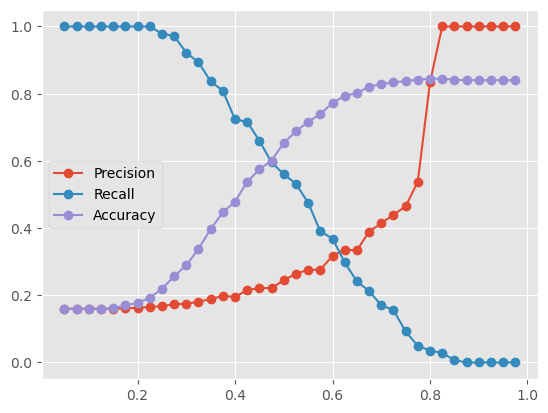

In [72]:
threshold
plt.plot(threshold["Threshold"], threshold["Precision"], label="Precision", marker='o')
plt.plot(threshold["Threshold"], threshold["Recall"], label="Recall", marker='o')
plt.plot(threshold["Threshold"], threshold["Acc"], label="Accuracy", marker='o')

plt.legend()

escolhendo um threshold de 0.55

<AxesSubplot:>

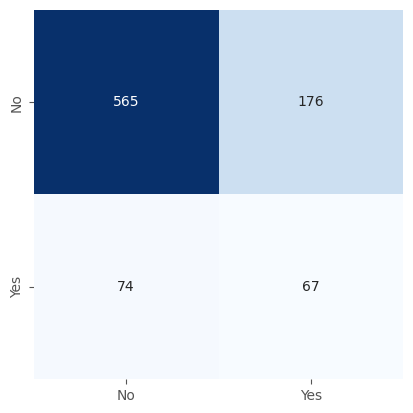

In [73]:
y_pred = (pip.predict_proba(X_test)[:,1]>0.55)
cm = confusion_matrix(y_test, y_pred)
classes = ["No", "Yes"]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True, xticklabels=classes, yticklabels=classes)

Isso significa que o modelo está prevendo que 586 pessoas não sairão da empresa, 91 de fato sairão e estamos prevendo isso, assim como 50 vão sair, mas o modelo não consegue identificar. Por fim, 155 não sairão, mas o modelo identifica que elas vão sair.

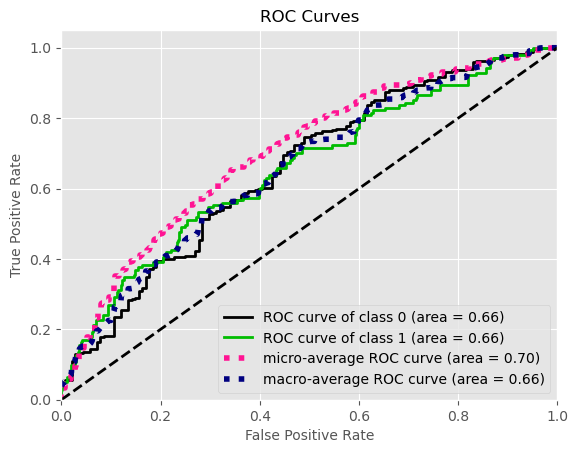

In [74]:
y_proba = pip.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_proba)
plt.show()

<p style="text-align: justify;"> A área abaixo da curva ROC indica o quão bom o modelo é em distinguir entre as classificações que estamos tentando trabalhar. É uma medida da capacidade do modelo de distinguir entre as classes. Uma AUC-ROC de 0.77 significa que, em média, o modelo classifica corretamente um par de exemplos aproximadamente 77% das vezes. Podemos buscar melhorar o modelo fazendo uso de outras técnicas/outros modelos para incrementar os resultados.

# Random Forest

Voltando um pouco, vamos tunar a Random Forest, isto é, vamos pegar os seus argumentos (em específico, o n_estimators e o max_depth) e encontrar o valor que maximiza o desempenho. Para isso, demonstraremos três técnicas: Grid Search, Random Search e a Bayesian. Cada uma delas tem suas vantagens, vamos começar pela Grid Search

### Grid Search

Na Grid Search nós fazemos tudo da forma mais bruta possível, isso é, escolhemos um número de valores para cada parâmetro que estamos tentando tunar e pedimos para o sistema escolher o melhor

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [76]:
param_grid = {
    'classifier__n_estimators': [50, 100, 150, 175],  
    'classifier__max_depth': [3, 5, 15, 20]
}

pip = Pipeline(steps=[
    ("preprocessing", preprocessing),
    ("select",SelectKBest(f_classif, k='all')),
    ("classifier", RandomForestClassifier(class_weight=weights_dict))
])

grid_search = GridSearchCV(estimator=pip, param_grid=param_grid, cv=6, scoring='precision')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=6,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler()),
                                                                                         ('Isolation',
                                                                                          IsolationForestTransformer(contamination=0.001))]),
                                                                         ['Age',
                                                                          'DistanceFromHome',


In [77]:
print("Melhores parâmetros:", grid_search.best_params_)

print("Melhor pontuação de validação cruzada:", grid_search.best_score_)

Melhores parâmetros: {'classifier__max_depth': 20, 'classifier__n_estimators': 175}
Melhor pontuação de validação cruzada: 0.9909090909090909


#### Dados de validação

In [78]:
y_pred_val = grid_search.predict(X_val)
print(precision_score(y_val, y_pred_val))
print(recall_score(y_val, y_pred_val))

0.9739130434782609
0.7516778523489933


#### Dados de teste

In [79]:
y_pred = grid_search.predict(X_test)
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

1.0
0.851063829787234


utilizando os melhores parâmetros

In [80]:
pip = Pipeline(steps=[
    ("preprocessing", preprocessing),
    ("select",SelectKBest(f_classif, k='all')),
    ("classifier", RandomForestClassifier(class_weight=weights_dict, n_estimators = 100, max_depth = 20))])

In [81]:
pip.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('Isolation',
                                                                   IsolationForestTransformer(contamination=0.001))]),
                                                  ['Age', 'DistanceFromHome',
                                                   'MonthlyIncome',
                                                   'NumCompaniesWorked',
                                                   'PercentSalaryHike',
                                                   'TotalWorkingYears',
               

In [82]:
threshold = []
for j in np.arange(0.05, 1, 0.025):
    
    y_pred = (pip.predict_proba(X_test)[:,1]>j)
    precision = precision_score(y_test, y_pred, zero_division = 1)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    
    threshold.append((j, precision, recall, f1, acc))

In [83]:
columns = ['Threshold' ,'Precision', 'Recall', 'F1', 'Acc']
threshold = pd.DataFrame(columns=columns, data = threshold)
threshold

,Threshold,Precision,Recall,F1,Acc
0,0.050,0.326190,0.971631,0.488414,0.674603
1,0.075,0.416413,0.971631,0.582979,0.777778
2,0.100,0.521401,0.950355,0.673367,0.852608
3,0.125,0.575758,0.943262,0.715054,0.879819
4,0.150,0.649746,0.907801,0.757396,0.907029
...,...,...,...,...,...
33,0.875,1.000000,0.255319,0.406780,0.880952
34,0.900,1.000000,0.156028,0.269939,0.865079
35,0.925,1.000000,0.092199,0.168831,0.854875
36,0.950,1.000000,0.014184,0.027972,0.842404


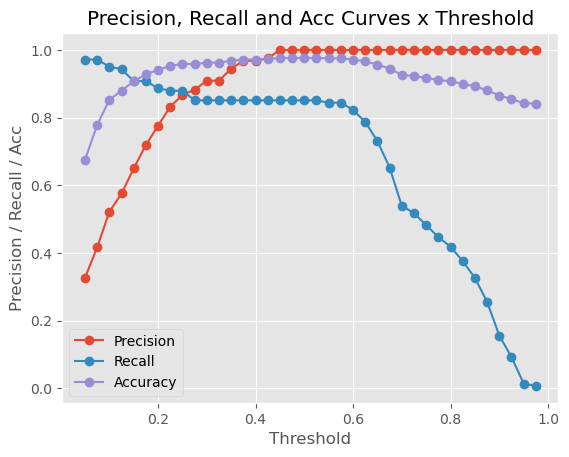

In [84]:
plt.plot(threshold["Threshold"], threshold["Precision"], label="Precision", marker='o')
plt.plot(threshold["Threshold"], threshold["Recall"], label="Recall", marker='o')
plt.plot(threshold["Threshold"], threshold["Acc"], label="Accuracy", marker='o')

plt.xlabel('Threshold')
plt.ylabel('Precision / Recall / Acc')
plt.title('Precision, Recall and Acc Curves x Threshold')
plt.legend()

escolhendo um threshold de 0.575

<AxesSubplot:>

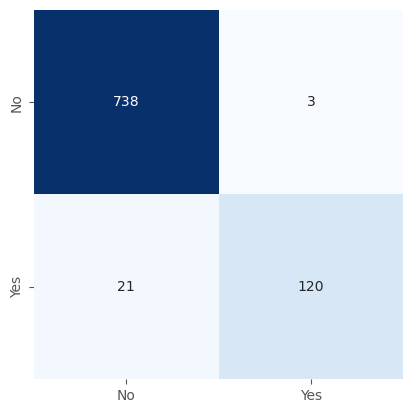

In [85]:
y_probas = (pip.predict_proba(X_test)[:,1]>0.425)
cm = confusion_matrix(y_test, y_probas)
classes = ["No", "Yes"]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True, xticklabels=classes, yticklabels=classes)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

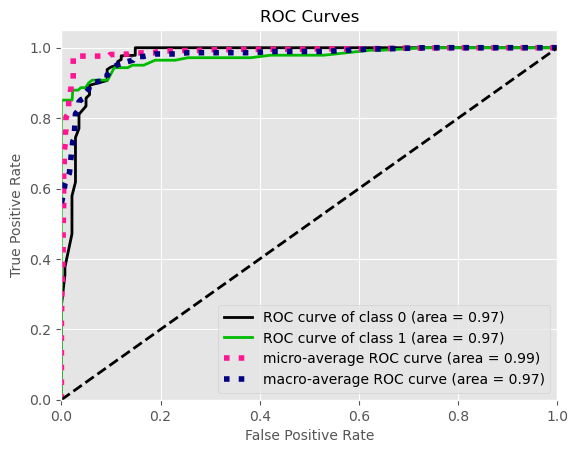

In [86]:
y_pred = pip.predict(X_test)
y_proba = pip.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_proba)

### Random Search

A Random Search seleciona aleatoriamente uma certa quantidade de número. Pode ser útil e menos custoso que uma boa Grid Search pois podemos selecionar, aleatoriamente, valores de diversas regiões dos nossos dados.

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [88]:
n_estimators_list = []
max_depth_list = []

for i in range(0,12):
    x = random.randint(50,200)
    n_estimators_list.append(x)
    y = random.randint(1,15)
    max_depth_list.append(y)
    
param_grid = {
    'classifier__n_estimators': n_estimators_list,  
    'classifier__max_depth': max_depth_list,
}

pip = Pipeline(steps=[
    ("preprocessing", preprocessing),
    ("select",SelectKBest(f_classif, k='all')),
    ("classifier", RandomForestClassifier(class_weight=weights_dict))
])

grid_search = RandomizedSearchCV(estimator=pip, param_distributions=param_grid, cv=6, scoring='precision', n_iter=10)
grid_search.fit(X_train, y_train)

RandomizedSearchCV(cv=6,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('numerical',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer()),
                                                                                               ('scaler',
                                                                                                StandardScaler()),
                                                                                               ('Isolation',
                                                                                                IsolationForestTransformer(contamination=0.001))]),
                                                                               ['Age',
                                  

In [89]:
print("Melhores parâmetros:", grid_search.best_params_)

print("Melhor pontuação de validação cruzada:", grid_search.best_score_)

Melhores parâmetros: {'classifier__n_estimators': 120, 'classifier__max_depth': 13}
Melhor pontuação de validação cruzada: 0.9689423671566529


nos forneceu que a melhor configuração foi para n_estimators = 59 e max_depth = 14

#### Nos dados de validação

In [90]:
y_pred_val = grid_search.predict(X_val)
print(precision_score(y_val, y_pred_val))
print(recall_score(y_val, y_pred_val))

0.9478260869565217
0.7315436241610739


#### Nos dados de teste

In [91]:
y_pred = grid_search.predict(X_test)
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.9829059829059829
0.8156028368794326


que mostra que o nosso modelo se adequou bem aos dados de teste, uma vez que a Precision mudou pouco, apesar do Recall ter variado consideravelmente, mostra uma boa adaptabilidade do modelo aos novos dados.

In [92]:
pip = Pipeline(steps=[
    ("preprocessing", preprocessing),
    ("select",SelectKBest(f_classif, k='all')),
    ("classifier", RandomForestClassifier(class_weight=weights_dict, n_estimators = 59, max_depth = 14))])
pip.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('Isolation',
                                                                   IsolationForestTransformer(contamination=0.001))]),
                                                  ['Age', 'DistanceFromHome',
                                                   'MonthlyIncome',
                                                   'NumCompaniesWorked',
                                                   'PercentSalaryHike',
                                                   'TotalWorkingYears',
               

In [93]:
threshold = []
for j in np.arange(0.05, 1, 0.025):
    
    y_pred = (pip.predict_proba(X_test)[:,1]>j)
    precision = precision_score(y_test, y_pred, zero_division = 1)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    
    threshold.append((j, precision, recall, f1, acc))

In [94]:
columns = ['Threshold' ,'Precision', 'Recall', 'F1', 'Acc']
threshold = pd.DataFrame(columns=columns, data = threshold)
threshold

,Threshold,Precision,Recall,F1,Acc
0,0.050,0.202363,0.971631,0.334963,0.383220
1,0.075,0.240351,0.971631,0.385373,0.504535
2,0.100,0.300668,0.957447,0.457627,0.637188
3,0.125,0.370787,0.936170,0.531187,0.735828
4,0.150,0.448276,0.921986,0.603248,0.806122
...,...,...,...,...,...
33,0.875,1.000000,0.120567,0.215190,0.859410
34,0.900,1.000000,0.070922,0.132450,0.851474
35,0.925,1.000000,0.049645,0.094595,0.848073
36,0.950,1.000000,0.007092,0.014085,0.841270


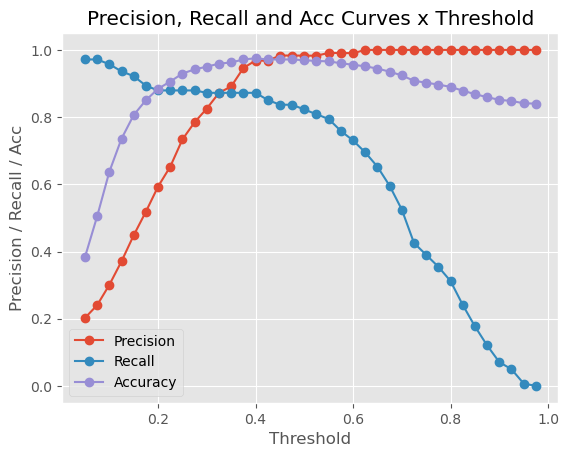

In [95]:
plt.plot(threshold["Threshold"], threshold["Precision"], label="Precision", marker='o')
plt.plot(threshold["Threshold"], threshold["Recall"], label="Recall", marker='o')
plt.plot(threshold["Threshold"], threshold["Acc"], label="Accuracy", marker='o')

plt.xlabel('Threshold')
plt.ylabel('Precision / Recall / Acc')
plt.title('Precision, Recall and Acc Curves x Threshold')
plt.legend()

vamos manter o Threshold em 0,525.

<AxesSubplot:>

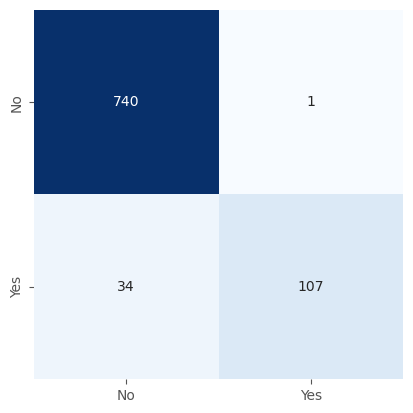

In [96]:
y_probas = (pip.predict_proba(X_test)[:,1]>0.575)
cm = confusion_matrix(y_test, y_probas)
classes = ["No", "Yes"]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True, xticklabels=classes, yticklabels=classes)

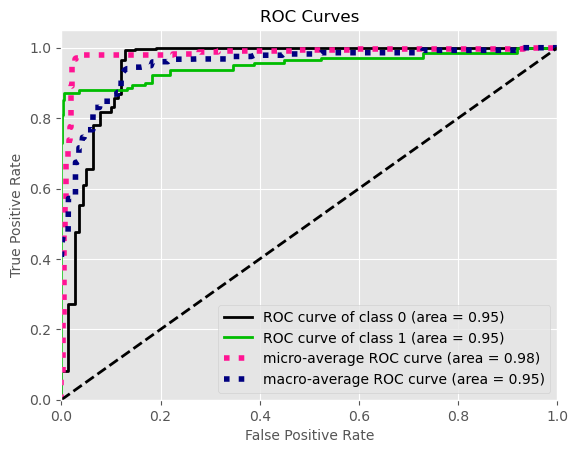

In [97]:
y_pred = pip.predict(X_test)
y_proba = pip.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_proba)
plt.show()

### Bayesian Search

In [98]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [99]:
param_dist = {
    'classifier__n_estimators': Integer(50, 150),  
    'classifier__max_depth': Integer(2, 20),       
}

In [100]:
pip = Pipeline(steps=[
    ("preprocessing", preprocessing),
    ("select",SelectKBest(f_classif, k='all')),
    ("classifier", RandomForestClassifier(class_weight=weights_dict))
])


In [101]:
grid_search = BayesSearchCV(estimator=pip, search_spaces=param_dist, 
                             n_iter=15, cv=6, scoring='precision', random_state=42)
grid_search.fit(X_train, y_train)


C:\Users\cadu2\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\cadu2\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BayesSearchCV(cv=6,
              estimator=Pipeline(steps=[('preprocessing',
                                         ColumnTransformer(transformers=[('numerical',
                                                                          Pipeline(steps=[('imputer',
                                                                                           SimpleImputer()),
                                                                                          ('scaler',
                                                                                           StandardScaler()),
                                                                                          ('Isolation',
                                                                                           IsolationForestTransformer(contamination=0.001))]),
                                                                          ['Age',
                                                                           'Distance

In [102]:
print("Melhores parâmetros:", grid_search.best_params_)

print("Melhor pontuação de validação cruzada:", grid_search.best_score_)

Melhores parâmetros: OrderedDict([('classifier__max_depth', 19), ('classifier__n_estimators', 120)])
Melhor pontuação de validação cruzada: 0.9941520467836257


Nos dados de validação

In [103]:
y_pred_val = grid_search.predict(X_val)
print(precision_score(y_val, y_pred_val))
print(recall_score(y_val, y_pred_val))

0.9736842105263158
0.7449664429530202


Nos dados de teste

In [104]:
y_pred = grid_search.predict(X_test)
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

1.0
0.8439716312056738


In [105]:
pip = Pipeline(steps=[
    ("preprocessing", preprocessing),
    ("select",SelectKBest(f_classif, k='all')),
    ("classifier", RandomForestClassifier(class_weight=weights_dict, n_estimators = 150, max_depth = 20))])

In [106]:
pip.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('Isolation',
                                                                   IsolationForestTransformer(contamination=0.001))]),
                                                  ['Age', 'DistanceFromHome',
                                                   'MonthlyIncome',
                                                   'NumCompaniesWorked',
                                                   'PercentSalaryHike',
                                                   'TotalWorkingYears',
               

In [107]:
threshold = []
for j in np.arange(0.05, 1, 0.025):
    
    y_pred = (pip.predict_proba(X_test)[:,1]>j)
    precision = precision_score(y_test, y_pred, zero_division = 1)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    
    threshold.append((j, precision, recall, f1, acc))

In [108]:
threshold = pd.DataFrame(columns=columns, data = threshold)
threshold

,Threshold,Precision,Recall,F1,Acc
0,0.050,0.314685,0.957447,0.473684,0.659864
1,0.075,0.447020,0.957447,0.609481,0.803855
2,0.100,0.540650,0.943262,0.687339,0.862812
3,0.125,0.601810,0.943262,0.734807,0.891156
4,0.150,0.675258,0.929078,0.782090,0.917234
...,...,...,...,...,...
33,0.875,1.000000,0.234043,0.379310,0.877551
34,0.900,1.000000,0.134752,0.237500,0.861678
35,0.925,1.000000,0.049645,0.094595,0.848073
36,0.950,1.000000,0.007092,0.014085,0.841270


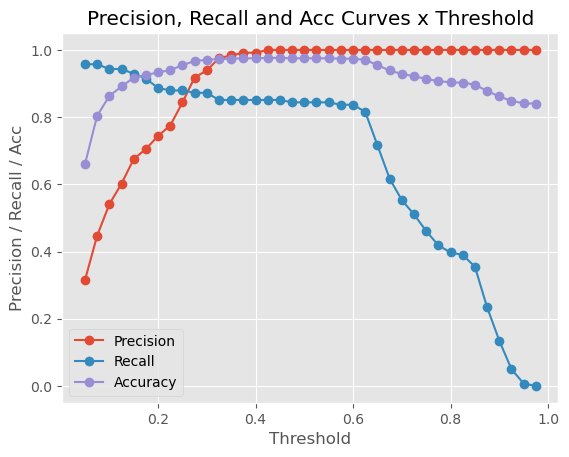

In [109]:
plt.plot(threshold["Threshold"], threshold["Precision"], label="Precision", marker='o')
plt.plot(threshold["Threshold"], threshold["Recall"], label="Recall", marker='o')
plt.plot(threshold["Threshold"], threshold["Acc"], label="Accuracy", marker='o')

plt.xlabel('Threshold')
plt.ylabel('Precision / Recall / Acc')
plt.title('Precision, Recall and Acc Curves x Threshold')
plt.legend()

mantendo o Threshold em 0.4

<AxesSubplot:>

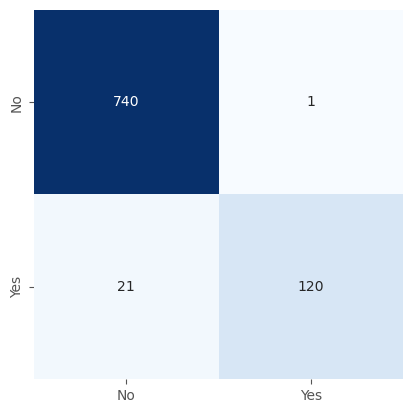

In [110]:
y_probas = (pip.predict_proba(X_test)[:,1]>0.4)
cm = confusion_matrix(y_test, y_probas)
classes = ["No", "Yes"]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True, xticklabels=classes, yticklabels=classes)

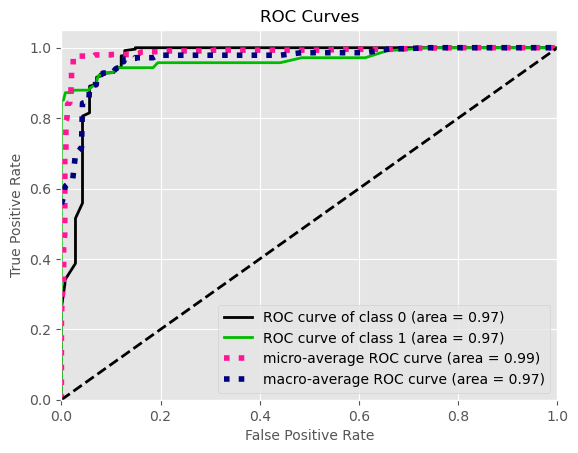

In [111]:
y_pred = pip.predict(X_test)
y_proba = pip.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_proba)
plt.show()

In [112]:
X_test.shape

(882, 26)

Todos os três métodos possuem o mesmo obtivo, maximizar a eficiência do modelo. A Bayesian Search é uma busca mais inteligente, ela se direciona para a região do espaço de parâmetros em que a eficiência do modelo será maximizada.

# Tradeoff

<p style="text-align: justify;"> Segundo a conclusão da nossa análise exploratória de dados, podemos aliar os dados do nosso modelo preditivo (Bayesian Search) para tentar buscar soluções visando melhorar as condições de trabalho e evitar demissões. Ressaltando alguns dados, fica claro que devemos investir em melhor condições de trabalho para que os funcionários consigam trabalhar. Dentre isso, oferecer uma melhor estrutura do ambiente de trabalho. Essa mudança na estrutura exigirá reformas e então mais gastos, mas o que se deve focar é em evitar a saída dos atuais funcionários e além, dos que ainda não entraram. Algumas pesquisas indicam que o custo de contratação de um funcionário está entre 1.5 e 2 vezes o salário do funcionário. Isso pois temos diversos fatos para levar em consideração, como custo do processo seletivo, recrutamento e treinamento. Logo, considerando o salário médio dos funcionários da empresa, podemos colocar que o custo sairia em torno de 90000 (na moeda local).
    
<p style="text-align: justify;"> Vamos propor que o um curso de idiomas na escolha do funcionário custa 4000 da moeda local. Segundo nosso modelo, precisaremos comprar 882 (número de funcionários no dataset de teste) desses cursos. Será que é suficiente para evitar perdas na empresa? Bom, o balanço da empresa nesse processo é:
    
                    CUSTO*QUANTIDADE DE FUNCIONÁRIOS - CUSTO DE RECONTRATAÇÃO*FUNCIONÁRIOS QUE SAIRÃO
    
no nosso caso:
    
                                CUSTO*882 - 90000*141 (120 confirmados e 21 que o modelo não detectou)
    
que significa que teremos que investir aproximadamente 14387.7 por funcionário para garantirmos que não teremos prejuízo.

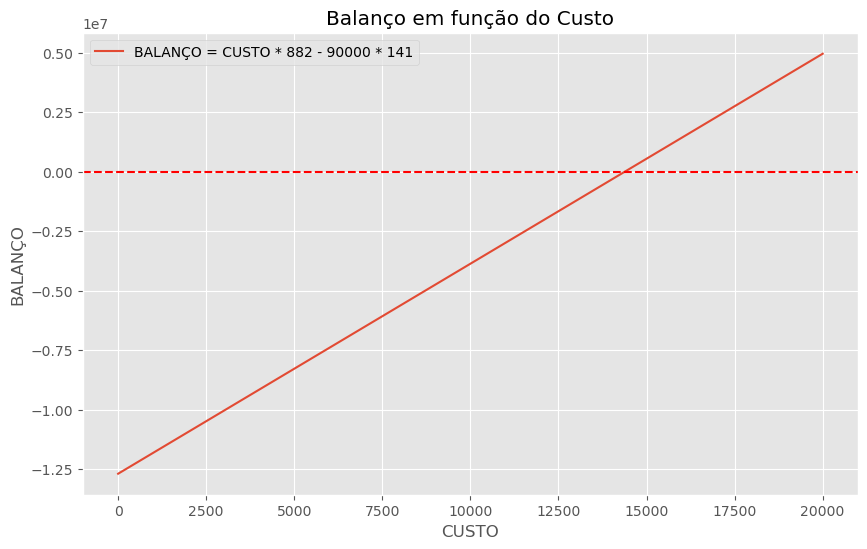

In [113]:
CUSTO = np.linspace(0, 20000, 20000)
BALANCO = CUSTO * 882 - 90000 * 141

plt.figure(figsize=(10, 6))
plt.plot(CUSTO, BALANCO, label='BALANÇO = CUSTO * 882 - 90000 * 141')
plt.xlabel('CUSTO')
plt.ylabel('BALANÇO')
plt.title('Balanço em função do Custo')
plt.axhline(0, color='red', linestyle='--', linewidth=1.5)

plt.legend()

logo, utilizaremos um montante de 12689951,4 na moeda local (771.750 reais).

Com o montante visto acima, conseguimos:

- Realizar diversas reformas na estrutura da empresa, de forma que o ambiente fique mais agradável de se trabalhar;
- Promover eventos e atividades de integração: Promova eventos e atividades de integração entre os funcionários, como happy hours, festas temáticas, campeonatos esportivos, voluntariado corporativo, entre outros;
- Fazer algumas viagens comemorativas na empresa;
- Considerar oferecer benefícios extras aos funcionários, como vales-alimentação, vales-refeição, plano de saúde subsidiado, auxílio-creche, vale-cultura, entre outros. Esses benefícios podem aumentar a satisfação e o engajamento dos colaboradores;
- Promover programas de reconhecimento e incentivo: Implementar programas de reconhecimento e incentivo, como premiações, reconhecimento público de desempenho excepcional, bônus por metas alcançadas, entre outros.

<p style="text-align: justify;"> Ao implementar essas iniciativas, é importante garantir que elas estejam alinhadas com a cultura organizacional e as necessidades específicas dos funcionários. Além disso, é fundamental monitorar e avaliar regularmente o impacto dessas iniciativas na satisfação dos funcionários e nos resultados do negócio.
    
<p style="text-align: justify;"> Vale ressaltar que essas medidas não são benéficas apenas para os funcionários que já estão na empresa, mas para desenvolver toda uma cultura de que a empresa é um bom ambiente de trabalhar, incentivando funcionários a darem bons feedbacks e atrair bons funcionários conforme o tempo passa. Por fim, essa estimativa foi feita em 1 ano dos funcionários num grupo de 882 deles. A empresa possui mais funcionários, o que significa valores maiores.
    